In [1]:
## importando os pacotes
from econometric_functions import *
import covid_daily

In [2]:
## lendo os dados e colocando-os em um dataframe
overview = covid_daily.overview(as_json=False)
print(overview.head(10))

  Country,Other  TotalCases  NewCases  TotalDeaths  NewDeaths  TotalRecovered  \
0         World   173557730    245996      3732930       5732       156675514   
1           USA    34197013      4990       612534        294        28093441   
2         India    28807855    114020       346772       2671        26975513   
3        Brazil    16841954         0       470968          0        15239692   
4        France     5707683      6654       109973         57         5406048   
5        Turkey     5282594      6126        48068         92         5154771   
6        Russia     5117274      9145       123436        399         4729077   
7            UK     4511669      5765       127836         13         4272579   
8         Italy     4230153      2436       126472         57         3908312   
9     Argentina     3915397         0        80411          0         3465137   

   NewRecovered  ActiveCases  Serious,Critical  TotCases/1M pop  \
0        391329     13149286             

In [29]:
## coletando os dados de mortes para o brasil
df = covid_daily.data("Brazil", 'graph-cases-daily')
df

,Novel Coronavirus Daily Cases
Date,
2020-02-15,NaN
2020-02-16,NaN
2020-02-17,NaN
2020-02-18,NaN
2020-02-19,NaN
...,...
2021-05-31,32554.0
2021-06-01,77898.0
2021-06-02,94509.0


In [30]:
# podemos ver quais as informações disponíveis
covid_daily.constants.AVAILABLE_CHARTS

['total-currently-infected-linear',
 'deaths-cured-outcome-small',
 'coronavirus-cases-linear',
 'graph-cases-daily',
 'graph-active-cases-total',
 'coronavirus-deaths-linear',
 'graph-deaths-daily',
 'cases-cured-daily',
 'deaths-cured-outcome']

In [31]:
## retirando os valores nulos
# renomeando
df.rename(columns = {'Novel Coronavirus Daily Cases':'novos_casos'}, inplace = True)
df.dropna(subset = ['novos_casos'], inplace=True)

In [42]:
## selecionando dados maiores que 0
df = df[df.index >= '2020-03-15']

In [43]:
## plottando
#criando o objeto gráfico
fig = go.Figure()

# gráfico de casos
# criando as barras
fig.add_trace(go.Scatter(x = df.index, y= df['novos_casos'], name = "Novos Casos"))
fig.update_traces(marker_color='rgb(225,180,143)')

#nomeando o eixo y e ajustando sua range
fig.update_yaxes(title_text = "Novos Casos")

##ajustando a posição da legenda, dando título à figura e ajustando suas dimensões
fig.update_layout(
    plot_bgcolor="#F9F9F9",
    paper_bgcolor="#F9F9F9",
    legend_orientation = 'h', legend = dict(x = -0.1,y = -0.2), 
    title ={
        'text': "Número de Novos Casos Diários no Brasil",
        'y':0.96, 'x': 0.04, 'xanchor':'left', 'yanchor':'top'
    },
    margin=dict(l=30, r=30, t=40, b=20)
)

In [44]:
## podemos ver que há uma sazonalidade nos dados (de 7 dias), o que se deve aos registros das secretarias de saúde
# para acharmos esse período, podemos achar a  função de autocorrelação
from statsmodels.graphics import tsaplots
from statsmodels.tsa.seasonal import seasonal_decompose

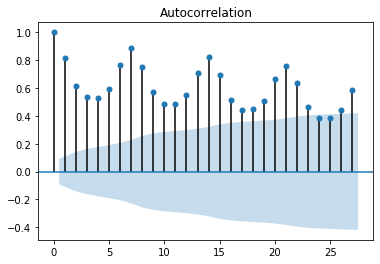

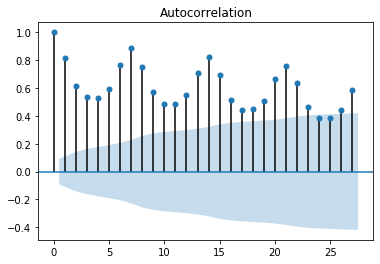

In [45]:
# plottando a autocorrelação
tsaplots.plot_acf(df['novos_casos'])
# no gráfico de pirulito, podemos ver que o período é de 7 dias

In [59]:
## decompondo a sazonalidade
# usamos o modelo multiplicativo, já que as amplitudes são diferentes ao longo do tempo
# (era pra usar, mas pra ver os resíduos coloquei o aditivo)
saz = seasonal_decompose(df['novos_casos'], model='additive', period = 7)

In [60]:
## plottando
#criando o objeto gráfico
fig = go.Figure()

# gráfico de casos
# criando as barras
fig.add_trace(go.Bar(x = df.index, y= saz.observed, name = "Novos Casos"))
fig.update_traces(marker_color='rgb(225,180,143)')

#adicionando a linha de tendência (sem a sazonalidade)
fig.add_trace(
    go.Scatter(
        x = df.index, y= saz.trend,
        name = "Tendência Dessazonalizada de Novos Casos", line = dict(color = 'rgb(143,0,0)',width = 4)
    )
)

#adicionando os resíduos
fig.add_trace(
    go.Scatter(
        x = df.index, y= saz.resid,
        name = "Resíduos", line = dict(color = 'rgb(143,143,0)',width = 1)
    )
)

#nomeando o eixo y e ajustando sua range
fig.update_yaxes(title_text = "Novos Casos")

##ajustando a posição da legenda, dando título à figura e ajustando suas dimensões
fig.update_layout(
    plot_bgcolor="#F9F9F9",
    paper_bgcolor="#F9F9F9",
    legend_orientation = 'h', legend = dict(x = -0.1,y = -0.2), 
    showlegend = False, 
    title ={
        'text': "Número de Novos Casos Diários no Brasil",
        'y':0.96, 'x': 0.04, 'xanchor':'left', 'yanchor':'top'
    },
    margin=dict(l=30, r=30, t=40, b=20)
)